In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importing Dataset
df = pd.read_csv('originalheart.csv')

In [3]:
df.sample(4)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
43,59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.0,3.0,0
235,54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,3
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
191,51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,3


In [4]:
df['target'].unique()

array([0, 2, 1, 3, 4])

In [5]:
#Replacing  missing or wrong values
df.replace('?', np.nan, inplace = True)

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# Replacing Missing Values with mean
df.fillna(df.mean(), inplace=True)

In [8]:
# Converting the whole target variable to only 0 and 1
df['target'] = df['target'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

In [9]:
# Converting Dtypes
df['thal'] = df['thal'].astype('int64')
df['oldpeak'] = df['oldpeak'].astype('int64')

# Splitting Data

In [10]:
X = df.drop(columns = 'target')
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Applying Standard Scaler

In [12]:
sc = StandardScaler()

In [13]:
X_train_trf = sc.fit_transform(X_train)
X_test_trf = sc.fit_transform(X_test)

# Applying Naive Bayes

In [14]:
nb = GaussianNB()

In [15]:
nb.fit(X_train_trf,y_train)

GaussianNB()

In [16]:
y_pred = nb.predict(X_test_trf)

In [17]:
print("Accuracy Score is ", accuracy_score(y_pred, y_test))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_trf.shape[0], (y_test != y_pred).sum()))

Accuracy Score is  0.8524590163934426
Number of mislabeled points out of a total 61 points : 9


In [18]:
confusion_matrix(y_pred, y_test)

array([[27,  7],
       [ 2, 25]])

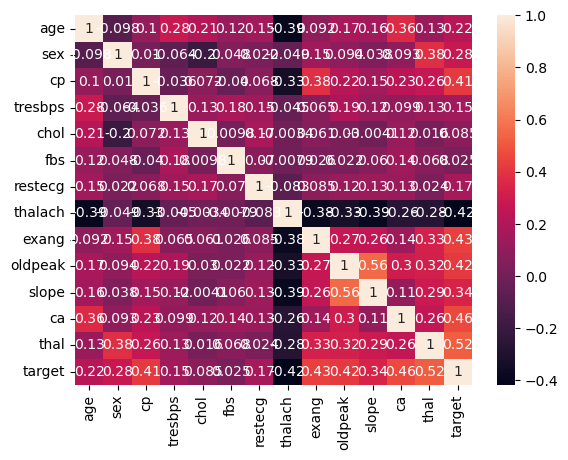

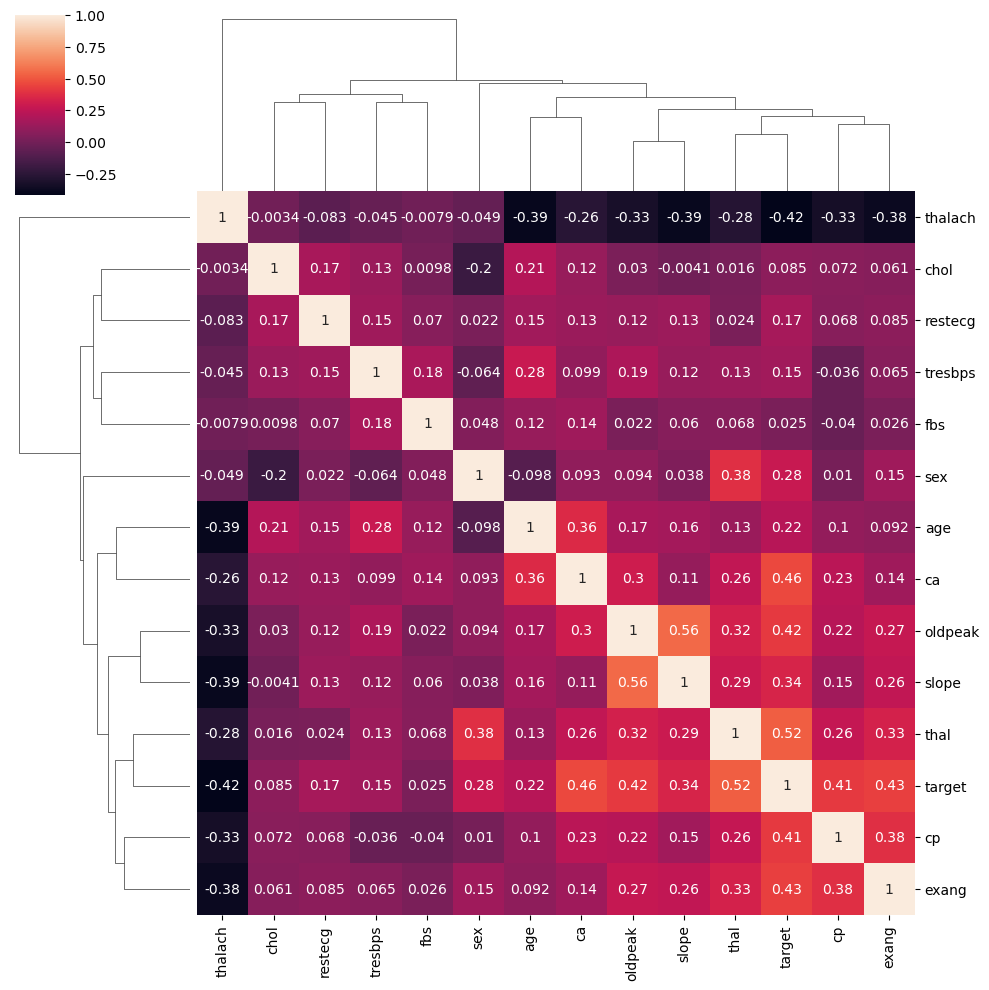

In [19]:
import seaborn as sns

# calculate the correlations
correlations = df.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
